# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


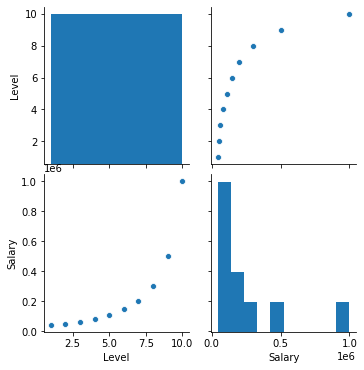

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


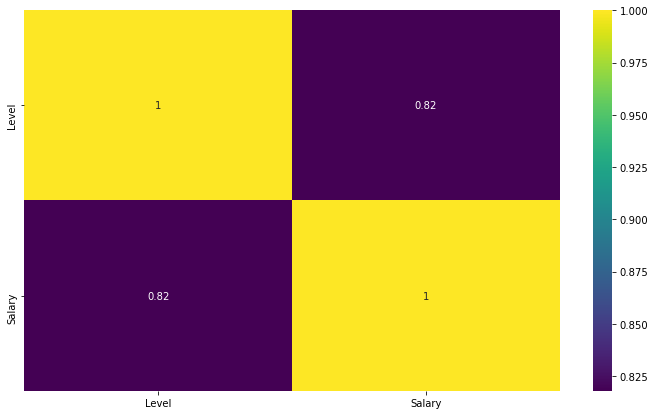

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [10]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

lin_reg_2.predict(poly_reg.fit_transform(x))

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391613])

## Visualising the Linear Regression results

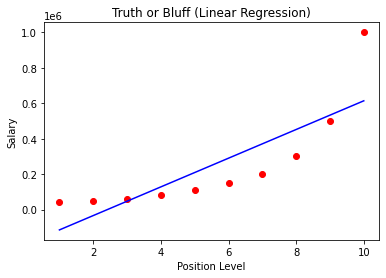

In [13]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

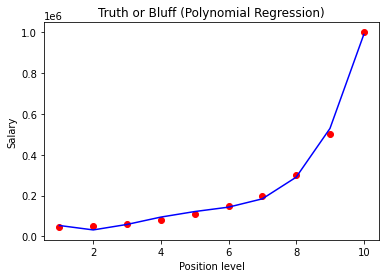

In [14]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

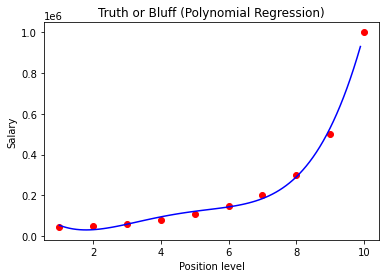

In [15]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [16]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [17]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])